# Polynomial Regression

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
dataset = pd.read_csv("/content/sample_data/Position_Salaries.csv") # the 2 columns which are the position and the level column are redundant -> so we should consider the level column only as it's numirc already.
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

Here we will ignore the train_test_split as we wnat to leverage the maximum data to make the future prediction for the salary between position 6 and 7 -> consider whole of the dataset as training set and input the test set to test the model against.

## Training the Linear Regression model on the whole dataset

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regressor_1 = LinearRegression()
linear_regressor_1.fit(X,y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [ ]:
# task#1 : create the matrix of powered features: -> out of feature x -> we want to create matrix of features -> x, x^2, x^3, .. , x^n
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) # this is the tool that will help us in task#1 -> # degree = 2 as we assumed n = 2
# the final polynomial regressor will be the combination of this matrix of powered features and the linear regressor
X_poly = poly_reg.fit_transform(X)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_poly,y)

LinearRegression()

In [ ]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

## Visualising the Linear Regression results

## Visualizing Linear Model prediction on Training set result

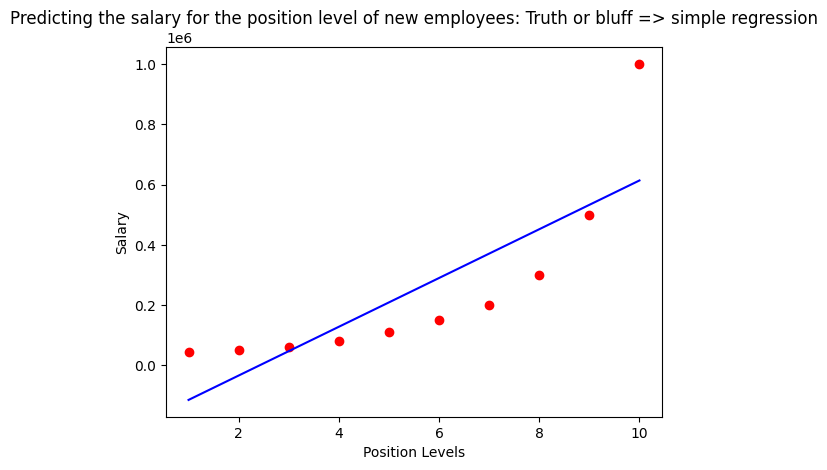

In [ ]:
plt.scatter(X,y,color='red')
plt.plot(X, linear_regressor_1.predict(X), color='blue')
plt.title("Predicting the salary for the position level of new employees: Truth or bluff => simple regression")
plt.xlabel('Position Levels')
plt.ylabel('Salary')
plt.show()

The results are not satisfied except only 2 points -> points under the line -> means that we will offer the interviewee a salary that is much more than supposed which is not accurate and indeed will lose us a lot.



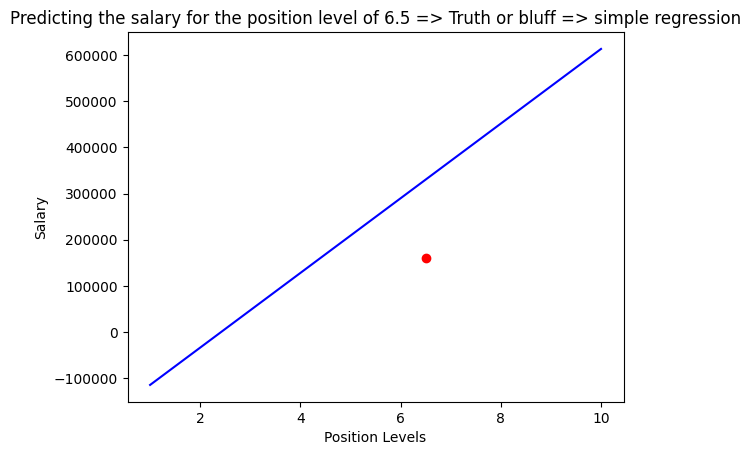

In [ ]:
plt.scatter([[6.5]],[[160000]],color='red')
plt.plot(X, linear_regressor_1.predict(X), color='blue')
plt.title("Predicting the salary for the position level of 6.5 => Truth or bluff => simple regression")
plt.xlabel('Position Levels')
plt.ylabel('Salary')
plt.show()

Here it's obvoius that there is a big error of the salary we should offer the interviewee (which is the red point) compared to what the model predicts to offer to him -> which indeed will lose us a lot => AND this shows that he used to get the salary he said which is 160000

## Visualising the Polynomial Regression results

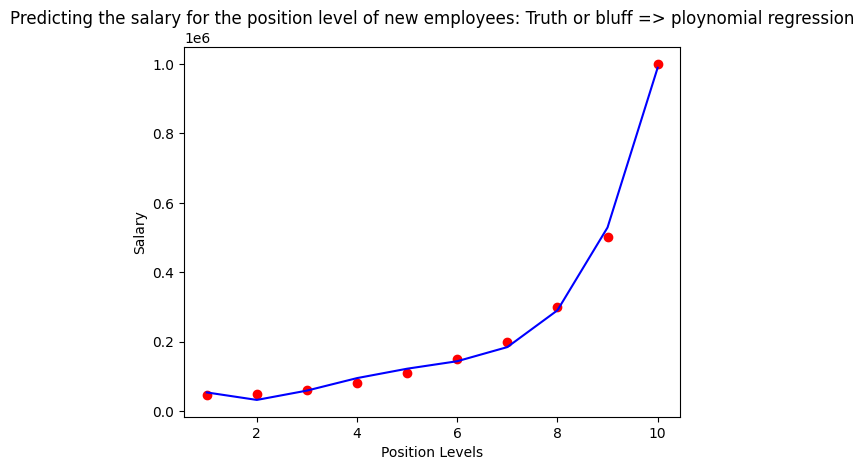

In [ ]:
plt.scatter(X,y,color='red')
plt.plot(X, linear_regressor_2.predict(X_poly), color='blue')
plt.title("Predicting the salary for the position level of new employees: Truth or bluff => ploynomial regression")
plt.xlabel('Position Levels')
plt.ylabel('Salary')
plt.show()

This clearly shows overfitting -> BUT this is OK in our task to determine the salary between position 6 and 7.

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

<ipython-input-37-cde904f31d43>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X)+0.1, 0.1) # the reason that the drawing is not smoth is that the X values are discrete 1,2,3,4,.. --converting them so lessen the difference 1.1,1.2,... --> will make the drawing smoth.


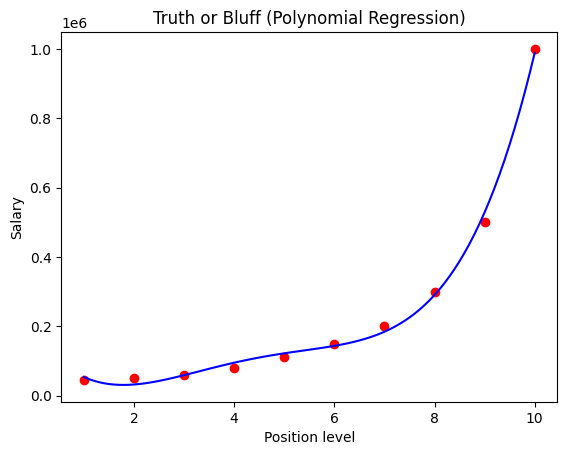

In [ ]:
X_grid = np.arange(min(X), max(X)+0.1, 0.1) # the reason that the drawing is not smoth is that the X values are discrete 1,2,3,4,.. --converting them so lessen the difference 1.1,1.2,... --> will make the drawing smoth.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, linear_regressor_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [ ]:
print(linear_regressor_1.predict([[6.5]])) # => [] is a list , [[]] is an array -> predict method takes an array

[330378.78787879]


here is, it's obvious --> the predicted salary by the model is to far from the real salary and what the interviewee asked for which is 160,000

## Predicting a new result with Polynomial Regression

In [ ]:
print(linear_regressor_2.predict(poly_reg.fit_transform([[6.5]])))

[158862.45265155]


here is, the predicted salary by the model is perfect and very close to the real salary and what the interviewee asked for which is 160,000.